In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Load the dataset
# Assuming you have a CSV file named 'company_strategies.csv' with historical data
data = pd.read_csv('companies_stratagies.csv')
print(data)

       Employbl Company ID  Company_ID     Zip  Latitude  Longitude  \
0                        1         466   94107        38       -122   
1                        2         457   94114        38       -122   
2                        3         424     432        38       -122   
3                        4         395   94103        38       -122   
4                        5         408   94612        38       -122   
...                    ...         ...     ...       ...        ...   
70078                70081      107919  163100     69033          0   
70079                70082      107920  163101     69034          0   
70080                70083      107921  163102     69035          0   
70081                70084      107922  163103     69036          0   
70082                70085      107923  163104     69037          0   

       R&D Spend  Administration  Marketing Spend   State  Profit  ...  \
0         165349          136898           471784     452  192262  ...   

<ipython-input-4-e362a8ab6e17>:3: DtypeWarning: Columns (12,13,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('companies_stratagies.csv')


In [ ]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of        Employbl Company ID  Company_ID     Zip  Latitude  Longitude  \
0                        1         466   94107        38       -122   
1                        2         457   94114        38       -122   
2                        3         424     432        38       -122   
3                        4         395   94103        38       -122   
4                        5         408   94612        38       -122   
...                    ...         ...     ...       ...        ...   
70078                70081      107919  163100     69033          0   
70079                70082      107920  163101     69034          0   
70080                70083      107921  163102     69035          0   
70081                70084      107922  163103     69036          0   
70082                70085      107923  163104     69037          0   

       R&D Spend  Administration  Marketing Spend   State  Profit  ...  \
0         165349          136898           

In [7]:
# Create target variable for classification (1 if next day's closing price is higher, 0 otherwise)
data['Target'] = (data['Profit'].shift(-1) > data['Profit']).astype(int)

In [8]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [13]:
# Gathering the Companies Strategies Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Profit', 'RATE', 'R&D Spend', 'Marketing Spend']])
print(scaled_data)

[[-4.80830892 -0.75363133  0.48437262  6.27045304]
 [-4.82139555 -0.75363133  0.23303036  5.15557222]
 [-4.84205572 -0.75363133 -0.60349808  3.71768181]
 ...
 [ 1.06065529  2.40921329  0.10365899  1.43226607]
 [ 1.06068313  2.40930958  0.10365899  1.43230605]
 [ 1.06071098  2.40940588  0.10365899  1.43234603]]


In [14]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [15]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train)

[[-0.66121123 -0.77212074  0.10365899]
 [-0.35921633 -0.64308007  0.10365899]
 [ 0.87744246  1.77556581  0.10365899]
 ...
 [ 0.63762298  0.94614246  0.10365899]
 [-5.11904679 -0.72936398 -0.49815543]
 [-0.45082275 -0.76846137  0.10365899]]


In [18]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

Decision Tree Accuracy: 0.994363986587715


In [19]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.9952200898908469


In [20]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

Logistic Regression Accuracy: 0.9959335093101235


In [21]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.9960048512520511


In [22]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(knn_predictions)

[1 1 1 ... 1 1 1]


In [41]:
# Neural Network using TensorFlow
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
nn_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f'Neural Network Accuracy: {nn_accuracy}')

Epoch 1/20
1753/1753 [==============================] - 21s 3ms/step - loss: 0.0383 - accuracy: 0.9952 - val_loss: 0.0096 - val_accuracy: 0.9956
Epoch 2/20
1753/1753 [==============================] - 5s 3ms/step - loss: 0.0080 - accuracy: 0.9963 - val_loss: 0.0078 - val_accuracy: 0.9961
Epoch 3/20
1753/1753 [==============================] - 5s 3ms/step - loss: 0.0078 - accuracy: 0.9964 - val_loss: 0.0077 - val_accuracy: 0.9961
Epoch 4/20
1753/1753 [==============================] - 6s 3ms/step - loss: 0.0077 - accuracy: 0.9963 - val_loss: 0.0077 - val_accuracy: 0.9959
Epoch 5/20
1753/1753 [==============================] - 4s 2ms/step - loss: 0.0075 - accuracy: 0.9965 - val_loss: 0.0079 - val_accuracy: 0.9961
Epoch 6/20
1753/1753 [==============================] - 6s 3ms/step - loss: 0.0076 - accuracy: 0.9965 - val_loss: 0.0089 - val_accuracy: 0.9954
Epoch 7/20
1753/1753 [==============================] - 4s 3ms/step - loss: 0.0075 - accuracy: 0.9962 - val_loss: 0.0092 - val_accuracy

In [33]:
# Deep Learning with Keras
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
dl_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
dl_accuracy = accuracy_score(y_test, dl_predictions)
print(f'DL Accuracy: {dl_accuracy}')

Epoch 1/10
1753/1753 [==============================] - 6s 2ms/step - loss: 0.0271 - accuracy: 0.9926
Epoch 2/10
1753/1753 [==============================] - 5s 3ms/step - loss: 0.0080 - accuracy: 0.9962
Epoch 3/10
1753/1753 [==============================] - 4s 2ms/step - loss: 0.0077 - accuracy: 0.9964
Epoch 4/10
1753/1753 [==============================] - 4s 2ms/step - loss: 0.0076 - accuracy: 0.9963
Epoch 5/10
1753/1753 [==============================] - 5s 3ms/step - loss: 0.0074 - accuracy: 0.9965
Epoch 6/10
1753/1753 [==============================] - 4s 2ms/step - loss: 0.0074 - accuracy: 0.9965
Epoch 7/10
1753/1753 [==============================] - 4s 2ms/step - loss: 0.0073 - accuracy: 0.9965
Epoch 8/10
1753/1753 [==============================] - 5s 3ms/step - loss: 0.0074 - accuracy: 0.9965
Epoch 9/10
1753/1753 [==============================] - 4s 2ms/step - loss: 0.0074 - accuracy: 0.9965
Epoch 10/10
439/439 [==============================] - 2s 4ms/step
DL Accuracy: 0.

In [40]:
# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("Deep Learning Accuracy:", accuracy_score(y_test, dl_predictions))
print(f'Decision Tree Accuracy: {dt_accuracy}')
print("DL Accuracy:", accuracy_score(y_test, dl_predictions))

Random Forest Classifier Accuracy: 0.9952200898908469
Logistic Regression Accuracy: 0.9959335093101235
SVM Accuracy: 0.9960048512520511
KNN Accuracy: 0.9957908254262681
Deep Learning Accuracy: 0.9957908254262681
Decision Tree Accuracy: 0.994363986587715
DL Accuracy: 0.9957908254262681


In [46]:
# Confusion Matrix :
print("\nConfusion Matrix for #RandomForestClassifier:")
print(confusion_matrix(y_test, rf_predictions))


Confusion Matrix for #RandomForestClassifier:
[[   77    27]
 [   40 13873]]


In [47]:
# Confusion Matrix :
print("\nConfusion Matrix for #Logistic Regression :")
print(confusion_matrix(y_test, lr_predictions))


Confusion Matrix for #Logistic Regression :
[[   76    28]
 [   29 13884]]


In [48]:
# Confusion Matrix :
print("\nConfusion Matrix for #Support Vector Machine:")
print(confusion_matrix(y_test, svm_predictions))


Confusion Matrix for #Support Vector Machine:
[[   75    29]
 [   27 13886]]


In [50]:
# Confusion Matrix :
print("\nConfusion Matrix for #KNeighborsClassifier:")
print(confusion_matrix(y_test, knn_predictions))


Confusion Matrix for #KNeighborsClassifier:
[[   75    29]
 [   30 13883]]


In [53]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=54)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)

[[ 0.7320485   1.27880309  0.10381768]
 [ 0.25220455 -0.38371633  0.10381768]
 [ 0.4809069   0.40867065  0.10381768]
 ...
 [ 0.58359356  0.76445     0.10381768]
 [-0.37320254 -0.75009296  0.10381768]
 [ 0.83150969  1.62340713  0.10381768]]


In [54]:
'''Implement and train SVM model'''
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9964684479006884


In [55]:
'''Implement and train CNN model'''

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_cnn)
print(X_test_cnn)

[[[ 0.92048812]
  [ 1.93169143]
  [ 0.10381768]]

 [[ 0.67991271]
  [ 1.09816775]
  [ 0.10381768]]

 [[-0.49874553]
  [-0.7717692 ]
  [ 0.10381768]]

 ...

 [[-0.56770381]
  [-0.6832338 ]
  [ 0.10381768]]

 [[-0.74680069]
  [-0.77119116]
  [ 0.10381768]]

 [[ 0.81187883]
  [ 1.55539191]
  [ 0.10381768]]]
[[[ 0.7320485 ]
  [ 1.27880309]
  [ 0.10381768]]

 [[ 0.25220455]
  [-0.38371633]
  [ 0.10381768]]

 [[ 0.4809069 ]
  [ 0.40867065]
  [ 0.10381768]]

 ...

 [[ 0.58359356]
  [ 0.76445   ]
  [ 0.10381768]]

 [[-0.37320254]
  [-0.75009296]
  [ 0.10381768]]

 [[ 0.83150969]
  [ 1.62340713]
  [ 0.10381768]]]


In [56]:
# Step 6: Visualize the results
# Assuming you have predictions from both models
svm_predictions = svm_model.predict(X_test)
print(svm_predictions)

[1 1 1 ... 1 1 1]


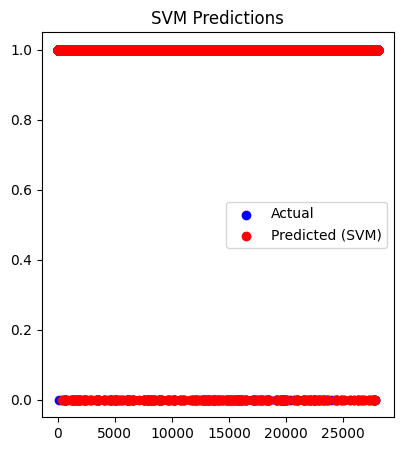

In [57]:
# Plotting SVM predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='red')
plt.title('SVM Predictions')
plt.legend()

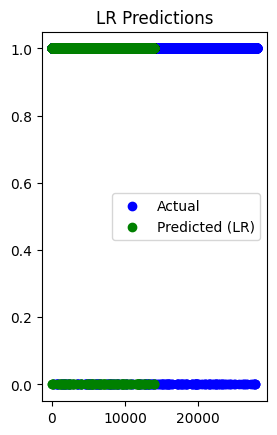

In [58]:
# Plotting LR predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(lr_predictions)), lr_predictions, label='Predicted (LR)', color='green')
plt.title('LR Predictions')
plt.legend()
plt.show()

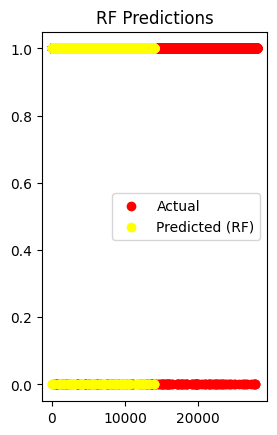

In [59]:
# Plotting RF predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='red')
plt.scatter(range(len(rf_predictions)), rf_predictions, label='Predicted (RF)', color='yellow')
plt.title('RF Predictions')
plt.legend()
plt.show()

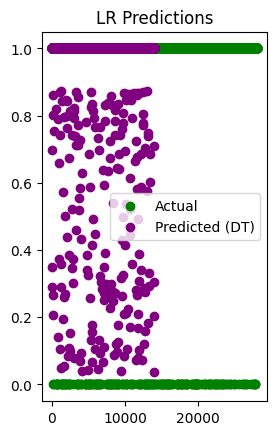

In [60]:
# Plotting DT predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dt_predictions)), dt_predictions, label='Predicted (DT)', color='purple')
plt.title('LR Predictions')
plt.legend()
plt.show()

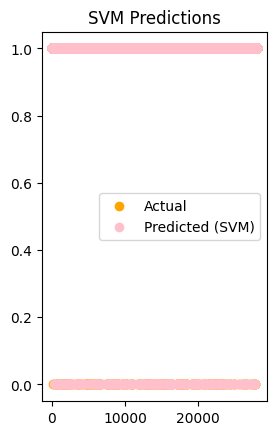

In [61]:
# Plotting SVM predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='orange')
plt.scatter(range(len(svm_predictions)), svm_predictions, label='Predicted (SVM)', color='pink')
plt.title('SVM Predictions')
plt.legend()
plt.show()

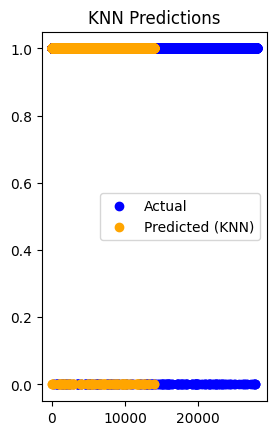

In [62]:
# Plotting KNN predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(knn_predictions)), knn_predictions, label='Predicted (KNN)', color='orange')
plt.title('KNN Predictions')
plt.legend()
plt.show()

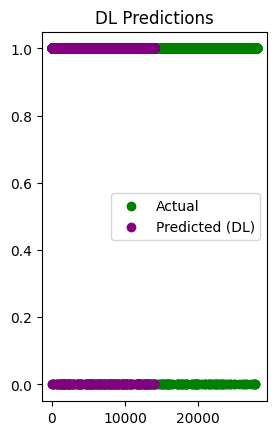

In [63]:
# Plotting DL predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green')
plt.scatter(range(len(dl_predictions)), dl_predictions, label='Predicted (DL)', color='purple')
plt.title('DL Predictions')
plt.legend()
plt.show()